In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import data as dt
import utility as ut
import matplotlib.cm as cm
import h5py as hf
import scipy.io as sio


/home/abhijit/anaconda3/envs/deep_learning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
root_dir = '/home/abhijit/nas_drive/Abhijit/Shubham/ejnmmi-dpnn/Codes/ProjectionVisualization'
floc = '/home/abhijit/nas_drive/Abhijit/Shubham/ejnmmi-dpnn/Codes/ProjectionVisualization/SUB3_NEW_EXT_DATASET/PXNET_GAP_SIG_WTD_NP_TEST_RESULT_SET_15_18_19_20_21ensemble__predictions.h5'
oploc = '/home/abhijit/nas_drive/Abhijit/Shubham/ejnmmi-dpnn/Codes/ProjectionVisualization/SUB3_NEW_EXT_DATASET/test.mat'
pred_arr = None



In [3]:
def extract_projections_from_hf(file_loc):
    pass

In [4]:
f = hf.File(floc, 'r')

In [5]:
t = f['test']['projections'][0,:,:,0]
sio.savemat(oploc, {"a" : t})

In [6]:
x = sio.loadmat(oploc)['a']

In [7]:
cm_list = ['PuOr',
 'PuOr_r',
 'RdYlBu',
  'Spectral',
  'gist_rainbow_r',
  'hsv',
 'hsv_r',
] #eval(open(root_dir+"/cmaps.md", 'r').read())

In [9]:
cmp_al = open(root_dir+"/allowed_cmaps.md", 'r').read()
cmp_al = cmp_al.split(',')
for ix in range(len(cmp_al)):
    cmp_al[ix] = cmp_al[ix].strip()

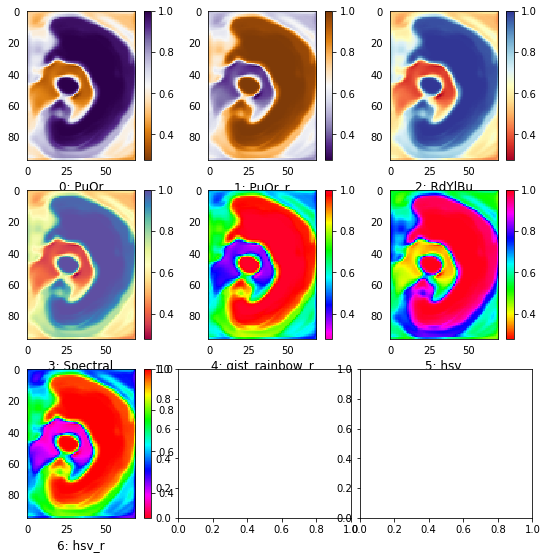

In [33]:
plt.close('all')
fig, axs = plt.subplots(3,3, figsize=(8, 8 ))#, constrained_layout=True)
fig.tight_layout()
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
c_idx = 5
for row in axs:
    for col in row:
        c_idx += 1
        current_cm = cm_list[c_idx]
        col.xaxis.set_ticks_position('none')
        col.yaxis.set_ticks_position('none')
        # col.axis('off')
        col.set_xlabel(str(c_idx)+": "+current_cm, fontsize=12)
        im = col.imshow(x, cmap=cm.get_cmap(current_cm))
        fig.colorbar(im, ax=col)
        if c_idx==6:
            break
plt.show()
        

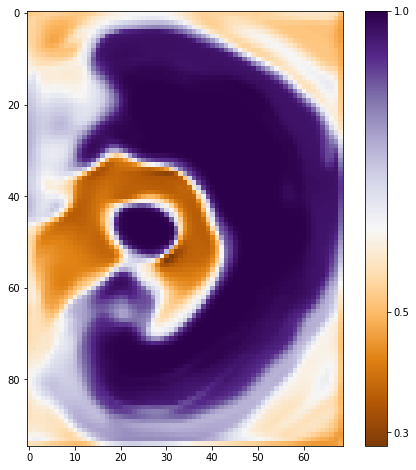

In [13]:
def plot_and_save(arr, cmap_name, op_loc):
    plt.close('all')
    fig, ax = plt.subplots(1,1, figsize=(8, 8 ))
    im = ax.imshow(x, cmap=cm.get_cmap(cmap_name))
    fig.colorbar(im, ax=ax, ticks=[0.3, .5, 1.])
    plt.savefig(op_loc)
    plt.show()
    

plot_and_save(x, cm_list[0],root_dir+"/tes_op.png")
    

In [37]:
idx_to_name = dt.get_newext_test_parkinson_cls_data_idx_key_map()

def save_projections_as_mat(input_h5_file, idx_to_name_map, output_mat_location):
    with hf.File(input_h5_file, 'r') as f:
        arr = f['test']['projections']
        print("Input Arr: ", arr.shape)
        arr_dict = {}
        for ix in range(arr.shape[0]):
            arr_dict[idx_to_name_map[ix]] = arr[ix,:,:,0]
        sio.savemat(output_mat_location, arr_dict)

save_projections_as_mat(floc, idx_to_name, root_dir+"/test_mat.mat")

Input Arr:  (108, 95, 69, 1)


In [38]:
r_mat = sio.loadmat(root_dir+"/test_mat.mat")

In [40]:
r_mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Feb 27 18:39:11 2019',
 '__version__': '1.0',
 'sw102376': array([[0.526521  , 0.5323155 , 0.5358146 , ..., 0.5802934 , 0.56437755,
         0.5126962 ],
        [0.5401579 , 0.54716617, 0.54126984, ..., 0.5633645 , 0.53266764,
         0.4905765 ],
        [0.54899967, 0.54846466, 0.5370442 , ..., 0.52437735, 0.50107807,
         0.4749455 ],
        ...,
        [0.62053794, 0.6320396 , 0.62273866, ..., 0.4926267 , 0.46781865,
         0.45870426],
        [0.63343656, 0.6541391 , 0.6542649 , ..., 0.4674393 , 0.45409352,
         0.46875232],
        [0.5700464 , 0.57605785, 0.5678389 , ..., 0.45439494, 0.46003488,
         0.4779815 ]], dtype=float32),
 'sw102584': array([[0.5306578 , 0.5337444 , 0.5385258 , ..., 0.57493687, 0.55693716,
         0.50538397],
        [0.54146266, 0.5467547 , 0.5406642 , ..., 0.5532581 , 0.52114075,
         0.48695788],
        [0.54898417, 0.5480632 , 0.5381447

In [1]:
p = '/home/abhijit/nas_drive/Abhijit/Shubham/ejnmmi-dpnn/Codes/data_stats/new_extended_development_data_summary.txt'
s = (open(p, 'r').readlines())

In [11]:
k = []
for line in s:
    if 'ClassId' in line:
        k.append(line)
idx_to_name_dict = {}

def extract_idx_n_name(s):
    idx = int((s.split('='))[1].split('key:')[0])
    name = (s.split('key:')[1].split('key_')[0]).strip()
    return (idx, name)
for i in range(len(k)):
    k[i] = k[i]

In [13]:
d = {}
for i in range(len(k)):
    idx, name = extract_idx_n_name(k[i])
    d[idx] = name
    print(idx, " "+name)

0  MSA_sw104999
1  MSA_sw105137
2  MSA_sw105261
3  MSA_sw107653
4  MSA_sw107917
5  MSA_sw109052
6  MSA_sw109123
7  MSA_sw109267
8  MSA_sw109432
9  MSA_sw110643
10  MSA_sw110817
11  MSA_sw110897
12  MSA_sw111297
13  MSA_sw111623
14  MSA_sw111890
15  MSA_sw111892
16  MSA_sw112196
17  MSA_sw112291
18  MSA_sw112293
19  MSA_sw112377
20  MSA_sw112592
21  MSA_sw112696
22  MSA_sw112904
23  MSA_sw113010
24  MSA_sw113097
25  MSA_sw113207
26  MSA_sw113209
27  MSA_sw113717
28  MSA_sw114085
29  MSA_sw114431
30  MSA_sw114433
31  MSA_sw114541
32  MSA_sw115031
33  MSA_sw115302
34  MSA_sw115306
35  MSA_sw115531
36  MSA_sw115715
37  MSA_sw115748
38  MSA_sw115770
39  MSA_sw115962
40  MSA_sw116007
41  MSA_sw116153
42  MSA_sw116160
43  MSA_sw116379
44  MSA_sw116514
45  MSA_sw116821
46  MSA_sw116824
47  MSA_sw117003
48  MSA_sw117349
49  MSA_sw117354
50  MSA_sw117413
51  MSA_sw117520
52  MSA_sw117556
53  MSA_sw117558
54  MSA_sw117563
55  MSA_sw117897
56  MSA_sw118142
57  MSA_sw118209
58  MSA_sw118211
59  MSA

In [16]:
with open('new_ext_train_data_idx_to_vol_mapping.txt', 'w') as f:
    f.write(str(d))

In [15]:
str(d)

"{0: 'MSA_sw104999', 1: 'MSA_sw105137', 2: 'MSA_sw105261', 3: 'MSA_sw107653', 4: 'MSA_sw107917', 5: 'MSA_sw109052', 6: 'MSA_sw109123', 7: 'MSA_sw109267', 8: 'MSA_sw109432', 9: 'MSA_sw110643', 10: 'MSA_sw110817', 11: 'MSA_sw110897', 12: 'MSA_sw111297', 13: 'MSA_sw111623', 14: 'MSA_sw111890', 15: 'MSA_sw111892', 16: 'MSA_sw112196', 17: 'MSA_sw112291', 18: 'MSA_sw112293', 19: 'MSA_sw112377', 20: 'MSA_sw112592', 21: 'MSA_sw112696', 22: 'MSA_sw112904', 23: 'MSA_sw113010', 24: 'MSA_sw113097', 25: 'MSA_sw113207', 26: 'MSA_sw113209', 27: 'MSA_sw113717', 28: 'MSA_sw114085', 29: 'MSA_sw114431', 30: 'MSA_sw114433', 31: 'MSA_sw114541', 32: 'MSA_sw115031', 33: 'MSA_sw115302', 34: 'MSA_sw115306', 35: 'MSA_sw115531', 36: 'MSA_sw115715', 37: 'MSA_sw115748', 38: 'MSA_sw115770', 39: 'MSA_sw115962', 40: 'MSA_sw116007', 41: 'MSA_sw116153', 42: 'MSA_sw116160', 43: 'MSA_sw116379', 44: 'MSA_sw116514', 45: 'MSA_sw116821', 46: 'MSA_sw116824', 47: 'MSA_sw117003', 48: 'MSA_sw117349', 49: 'MSA_sw117354', 50: 'MSA

In [17]:
idx_to_name = d
img_name_list= sorted(list(idx_to_name[k] for k in idx_to_name.keys()))

In [18]:
img_name_list

['MSA_sw104999',
 'MSA_sw105137',
 'MSA_sw105261',
 'MSA_sw107653',
 'MSA_sw107917',
 'MSA_sw109052',
 'MSA_sw109123',
 'MSA_sw109267',
 'MSA_sw109432',
 'MSA_sw110643',
 'MSA_sw110817',
 'MSA_sw110897',
 'MSA_sw111297',
 'MSA_sw111623',
 'MSA_sw111890',
 'MSA_sw111892',
 'MSA_sw112196',
 'MSA_sw112291',
 'MSA_sw112293',
 'MSA_sw112377',
 'MSA_sw112592',
 'MSA_sw112696',
 'MSA_sw112904',
 'MSA_sw113010',
 'MSA_sw113097',
 'MSA_sw113207',
 'MSA_sw113209',
 'MSA_sw113717',
 'MSA_sw114085',
 'MSA_sw114431',
 'MSA_sw114433',
 'MSA_sw114541',
 'MSA_sw115031',
 'MSA_sw115302',
 'MSA_sw115306',
 'MSA_sw115531',
 'MSA_sw115715',
 'MSA_sw115748',
 'MSA_sw115770',
 'MSA_sw115962',
 'MSA_sw116007',
 'MSA_sw116153',
 'MSA_sw116160',
 'MSA_sw116379',
 'MSA_sw116514',
 'MSA_sw116821',
 'MSA_sw116824',
 'MSA_sw117003',
 'MSA_sw117349',
 'MSA_sw117354',
 'MSA_sw117413',
 'MSA_sw117520',
 'MSA_sw117556',
 'MSA_sw117558',
 'MSA_sw117563',
 'MSA_sw117897',
 'MSA_sw118142',
 'MSA_sw118209',
 'MSA_sw118211